# Neural Networks Assignment (Graded)

Welcome to your first (required) programming assignment! You will build a Neural Network to recognize various everyday objects. This assignment will step you through how to do this with a Neural Network mindset, and will also hone your intuitions about deep learning.

**Instructions:**
* Do not modify any of the codes.
* Only write code when prompted. For example in some sections you will find the following,
```
# YOUR CODE GOES HERE
# YOUR CODE ENDS HERE
# TODO
```
Only modify those sections of the code.

**You will learn to:**
* Explore the CIFAR10 dataset: https://www.cs.toronto.edu/~kriz/cifar.html
* Build the general architecture of a neural network, including:
  * Initializing parameters
  * Calculating the cost function and its gradient
  * Using an optimization algorithm (gradient descent)
* Gather all three functions above into a main model function, in the right order.

In [159]:
import tensorflow as tf
import numpy as np

from helpers import *
from tests import *

In [160]:
# Import dataset
from tensorflow.keras.datasets import cifar10

# Load dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


## Visualizing the dataset

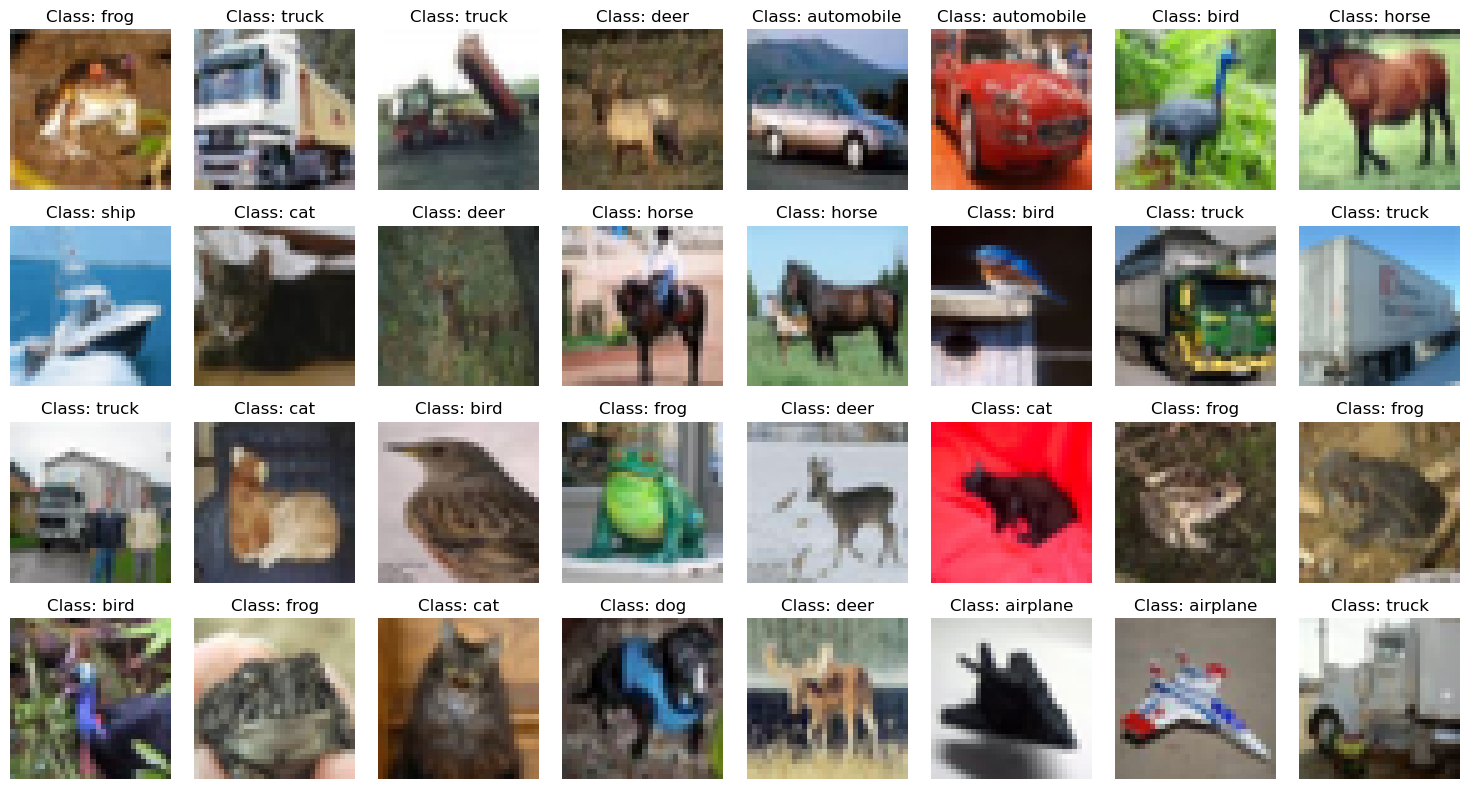

In [140]:
import matplotlib.pyplot as plt

# Visualize a grid of images from the training set
display_image_grid(X_train[:32], y_train[:32])


#### How many images does the training dataset contain?


In [161]:
# YOUR CODE GOES HERE
num_samples_train = sum(1 for _ in X_train)
print(f"Number of training samples: {num_samples_train}")


Number of training samples: 50000



**Expected Output:**
```
50000
```



#### How many images does the testing dataset contain?


In [162]:
# YOUR CODE GOES HERE
num_samples_test = sum(1 for _ in X_test)
print(f"Number of training samples: {num_samples_test}")


Number of training samples: 10000



**Expected Output:**
```
10000
```



#### How many output classes does the dataset contain? Can you list them?

In [163]:
# YOUR CODE GOES HERE

unique_classes = np.unique(y_train)

# Display the unique class labels
print(unique_classes)



[0 1 2 3 4 5 6 7 8 9]


**Expected Output:**
```
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)
```

#### Find out the total number of images in each class.

In [164]:
# TODO

num_classes = len(np.unique(y_train))
for cls in range(num_classes):
  count = 0
  count = np.sum(y_train == cls) 
  print("Number of images belonging to {} is {}".format(cls, count))

Number of images belonging to 0 is 5000
Number of images belonging to 1 is 5000
Number of images belonging to 2 is 5000
Number of images belonging to 3 is 5000
Number of images belonging to 4 is 5000
Number of images belonging to 5 is 5000
Number of images belonging to 6 is 5000
Number of images belonging to 7 is 5000
Number of images belonging to 8 is 5000
Number of images belonging to 9 is 5000


**Expected Output:**
```
Number of images belonging to 0 is 5000
Number of images belonging to 1 is 5000
Number of images belonging to 2 is 5000
Number of images belonging to 3 is 5000
Number of images belonging to 4 is 5000
Number of images belonging to 5 is 5000
Number of images belonging to 6 is 5000
Number of images belonging to 7 is 5000
Number of images belonging to 8 is 5000
Number of images belonging to 9 is 5000
```



---



# Preprocessing the dataset
We shall be performing the following steps to preprocess our dataset in order to get the highest possible model performance:

1. **Normalization:** Scaling down the pixel values between 0 to 1.
2. **Flattening:** Flattenning the dataset such that the shape of the image (num_px, num_px, 3) are flattened into single vectors of shape (num_px
 num_px
 3, 1).
3. **One Hot Encoding:** Encoding the values into a one hot vector.

In [165]:
# TODO

def data_preprocessing(X_train, X_test, y_train, y_test):

    """Preprocesses the training and testing data for a machine learning model.

    Args:
        X_train: Training dataset features.
        X_test: Testing dataset features.
        y_train: Training dataset labels.
        y_test: Testing dataset labels.

    Returns:
        X_train: Preprocessed training dataset features.
        X_test: Preprocessed testing dataset features.
        y_train: Preprocessed training dataset labels.
        y_test: Preprocessed testing dataset labels.

    """

    # Data Normalization
    # YOUR CODE GOES HERE
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Flattening
    # YOUR CODE GOES HERE
    X_train = X_train.reshape(X_train.shape[0], -1, 1)  # Shape: (50000, 3072, 1)
    X_test = X_test.reshape(X_test.shape[0], -1, 1)    # Shape: (10000, 3072, 1)



    # One Hot Encoding
    # YOUR CODE GOES HERE
    y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes=10)
    y_test_oh = tf.keras.utils.to_categorical(y_test, num_classes=10)


    # YOUR CODE ENDS HERE
    preprocessing_tests(X_train, X_test, y_train_oh, y_test_oh)

    return X_train, X_test, y_train_oh, y_test_oh



# Model Building

Here, you shall be building a feedforward neural network with atleast 3 hidden neurons.

In [146]:
# TODO

# Import necessary modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

def build_model(input_shape, num_classes):
    """Builds a feedforward neural network model.

    Args:
        input_shape: Tuple specifying the input shape.
        num_classes: Number of output classes.

    Returns:
        Compiled Keras model.
    """
    model = Sequential()
    model.add(Input(shape=input_shape))

    # Add at least 3 hidden layers with 'relu' activation function
    model.add(Dense(512, activation='relu'))  # First hidden layer
    model.add(Dense(256, activation='relu'))  # Second hidden layer
    model.add(Dense(128, activation='relu'))  # Third hidden layer

    # Also ensure that the final layer has 10 neurons
    model.add(Dense(num_classes, activation='softmax'))

    # YOUR CODE GOES HERE
    # No additional layers needed. Model is complete.
    # YOUR CODE ENDS HERE

    # Check model structure (Comment this if causing issues)
    test_model_structure(model)

    return model


In [166]:
# TODO

# Import necessary modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

def build_model(input_shape, num_classes):
    """Builds a feedforward neural network model.

    Args:
        input_shape: Tuple specifying the input shape.
        num_classes: Number of output classes.

    Returns:
        Compiled Keras model.
    """
    model = Sequential()
    model.add(Input(shape=input_shape))

    # Add at least 3 hidden layers with 'relu' activation function
    model.add(Dense(1024, activation='relu'))  # First hidden layer
    model.add(Dense(512, activation='relu'))  # Second hidden layer
    model.add(Dense(256, activation='relu'))  # Third hidden layer
    model.add(Dense(128, activation='relu'))  # Fourth hidden layer

    # Also ensure that the final layer has 10 neurons
    model.add(Dense(num_classes, activation='softmax'))

    # YOUR CODE GOES HERE
    # No additional layers needed. Model is complete.
    # YOUR CODE ENDS HERE

    # Check model structure (Comment this if causing issues)
    test_model_structure(model)

    return model


# Model Training and Evaluation



In [167]:
np.random.seed(43)  # for reproducibility
tf.random.set_seed(43)  # for reproducibility

In [179]:
# TODO

def compile_model(model):
    """Compiles the given model.

    Args:
        model(tf.keras.Model): The model to be compiled.

    Returns:
        None
    """
    # Compile the model such that it has categorical cross-entropy loss,
    # Adam optimizer, and measures performance using the 'Accuracy' metric.

    # YOUR CODE GOES HERE
    model.compile(
        loss='categorical_crossentropy',  # Multi-class classification
        optimizer='adam',  # Adam optimizer
        metrics=['accuracy']  # Performance metric
    )
    # YOUR CODE ENDS HERE
from tensorflow.keras.optimizers import Adam

def compile_model(model):
    optimizer = Adam(learning_rate=0.0005)  # Reduced LR from default 0.001 to 0.0005
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    # Ensure this function does not break execution
    #test_model_compilation(model)


In [180]:
def train_model(x_train, y_train, model, epochs, val_split, batch_sz):
    """Trains the model using the provided training data.

    Args:
        x_train: Training dataset features.
        y_train: Training dataset labels.
        model (tf.keras.Model): The compiled neural network model.
        epochs (int, optional): Number of epochs to train the model. Defaults to 10.
        val_split (float, optional): Fraction of the training data to be used as validation data. Defaults to 0.2.

    Returns:
        tf.keras.callbacks.History: The training history object.
    """
    device = detect_and_set_device()
    print(device)
    with tf.device('/' + device + ':0'):
    
        history = model.fit(
            x_train, y_train,
            epochs=epochs,
            batch_size=batch_sz,
            validation_split=val_split,
        )

    return history

In [170]:
import torch
device = torch.device("mps")
print(device)

mps


# Training and evaluation

Here, you shall be building a pipeline from preprocessing the dataset to training on it.<br>
Complete all the TODOs in the following section.
<br>
Also, you need to **achieve atleast 50% on the validation accuracy to pass this test.**

In [181]:
model = build_model((3072, 1), 10)
print(type(model))  # Ensure it prints <class 'tensorflow.keras.models.Sequential'>
compile_model(model)


<class 'keras.src.engine.sequential.Sequential'>


CPU
Epoch 1/26
157/157 [==============================] - 3s 17ms/step - loss: 1.9279 - accuracy: 0.3001 - val_loss: 1.8466 - val_accuracy: 0.3240
Epoch 2/26
157/157 [==============================] - 3s 16ms/step - loss: 1.7098 - accuracy: 0.3865 - val_loss: 1.7000 - val_accuracy: 0.3951
Epoch 3/26
157/157 [==============================] - 3s 17ms/step - loss: 1.6307 - accuracy: 0.4156 - val_loss: 1.6381 - val_accuracy: 0.4194
Epoch 4/26
157/157 [==============================] - 3s 17ms/step - loss: 1.5590 - accuracy: 0.4437 - val_loss: 1.6460 - val_accuracy: 0.4181
Epoch 5/26
157/157 [==============================] - 3s 17ms/step - loss: 1.5056 - accuracy: 0.4614 - val_loss: 1.6075 - val_accuracy: 0.4322
Epoch 6/26
157/157 [==============================] - 3s 17ms/step - loss: 1.4678 - accuracy: 0.4754 - val_loss: 1.5088 - val_accuracy: 0.4691
Epoch 7/26
157/157 [==============================] - 3s 17ms/step - loss: 1.4324 - accuracy: 0.4879 - val_loss: 1.5027 - val_accuracy: 0.

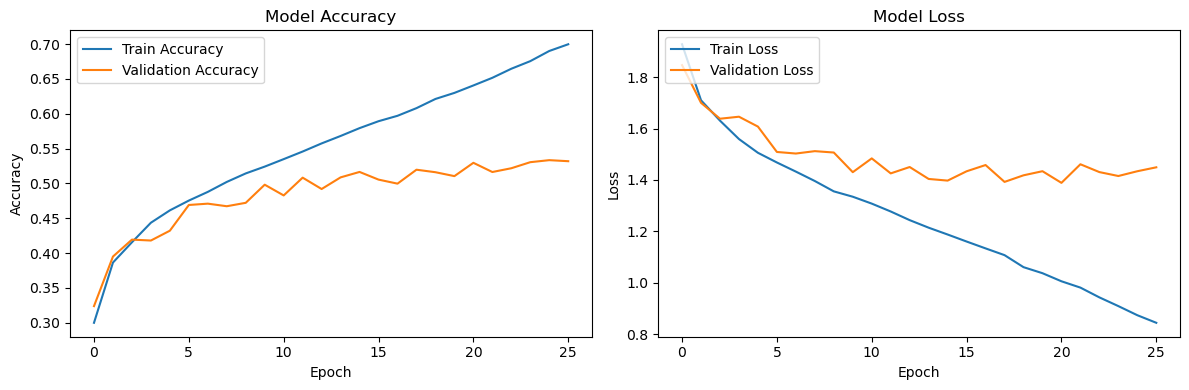

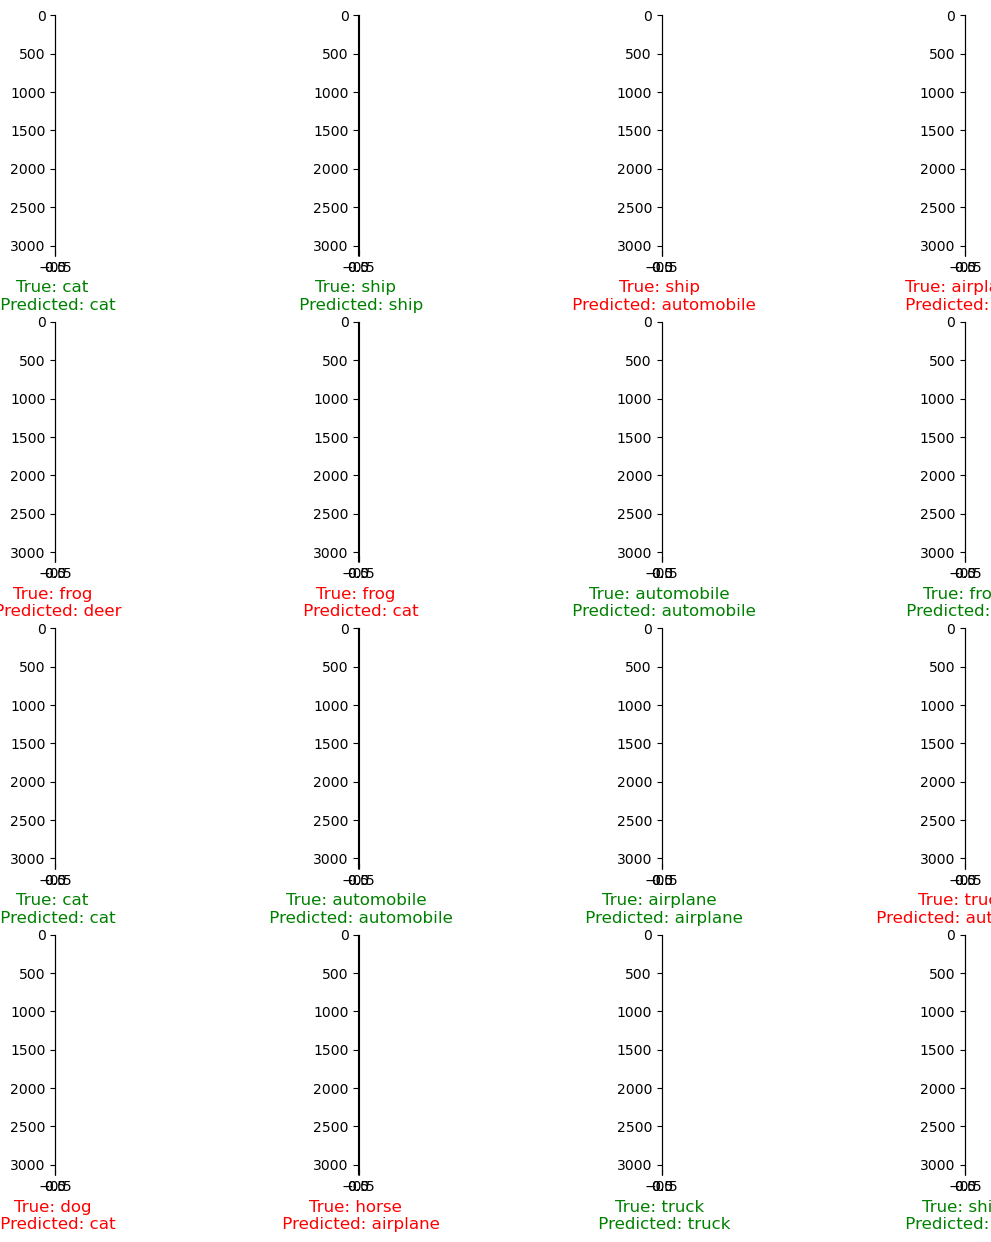

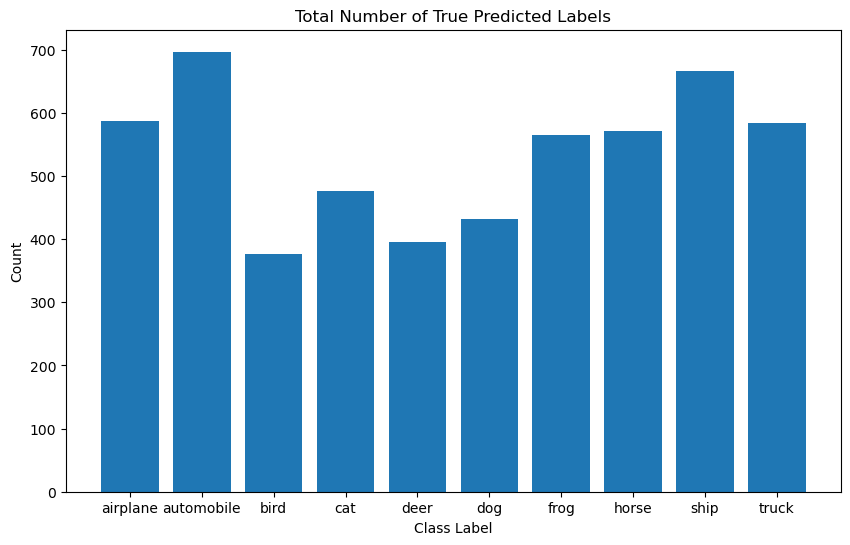

In [187]:
# TODO

def main(epochs, val_split, batch_sz):
    """Main function to run the training pipeline.

    Args:
        epochs(int, optional): Number of epochs to train the model.
        val_split: Fraction of the training data to be used as validation data.
        batch_sz: Batch size for training.

    Returns:
        None
    """

    # (TODO) Preprocess the data
    X_train_p, X_test_p, y_train_oh, y_test_oh = data_preprocessing(X_train, X_test, y_train, y_test)

    # (TODO) Build Model
    model = build_model((3072,), 10)  # ✅ Fixed input shape to (3072,)

    # (TODO) Compile model
    compile_model(model)

    # Train model
    history = train_model(X_train_p, y_train_oh, model, epochs=epochs, val_split=val_split, batch_sz=batch_sz)

    # Evaluate model
    test_loss, test_acc = model.evaluate(X_test_p, y_test_oh)
    print('Test accuracy:', test_acc)

    # Make predictions
    y_pred = model.predict(X_test_p)
    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test_oh, axis=1)

    # Plots
    plot_metrics(history)
    plot_predictions(X_test_p, y_true, y_pred, num_samples=16)
    plot_label_comparison(y_true, y_pred)

    # Validate model accuracy
    test_model_accuracy(history=history)

    return history

if __name__ == "__main__":
    
    # (TODO) Feel free to adjust the parameters
    history = main(epochs=26, val_split=0.2, batch_sz=256)


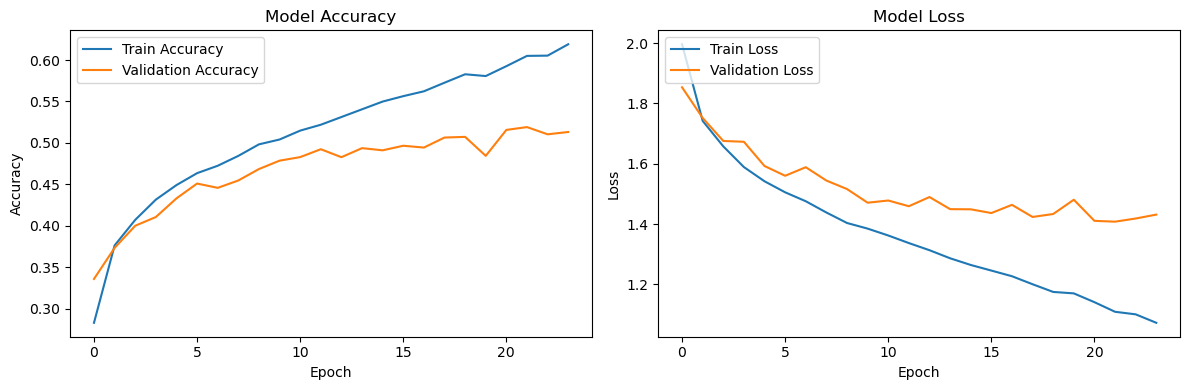

In [153]:
plot_metrics(history)

## Improvement Strategies

Consider the following strategies to help improve the accuracy of the above model.


1. **Increase the number of epochs**: The model might need more training iterations to learn the patterns in the data effectively.
2. **Add more FFN layers:** Stacking multiple FFN layers can help the model capture more complex dependencies.
3. **Adjust the learning rate:** Fine-tuning the learning rate can impact the model's convergence speed and performance.
4. **Try different Optimizers:** Explore various optimization algorithms (e.g., SGD, RMSprop).
Replace Adam in the `compile_model` function with another optimizer from `keras.optimizers`.


In [154]:
def build_model(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        Dense(1024, activation='relu'),  # Increased neurons
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    return model


In [155]:
from tensorflow.keras.optimizers import Adam

def compile_model(model):
    optimizer = Adam(learning_rate=0.0005)  # Reduced LR from default 0.001 to 0.0005
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )


In [156]:
from tensorflow.keras.optimizers import SGD

def compile_model(model):
    optimizer = SGD(learning_rate=0.01, momentum=0.9)  # Higher learning rate with momentum
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )


In [157]:
from tensorflow.keras.optimizers import RMSprop

def compile_model(model):
    optimizer = RMSprop(learning_rate=0.0005, rho=0.9)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )


CPU
Epoch 1/24
625/625 [==============================] - 6s 9ms/step - loss: 1.9642 - accuracy: 0.2833 - val_loss: 1.8798 - val_accuracy: 0.3280
Epoch 2/24
625/625 [==============================] - 6s 9ms/step - loss: 1.7485 - accuracy: 0.3715 - val_loss: 1.7757 - val_accuracy: 0.3669
Epoch 3/24
625/625 [==============================] - 6s 9ms/step - loss: 1.6494 - accuracy: 0.4069 - val_loss: 1.7700 - val_accuracy: 0.3732
Epoch 4/24
625/625 [==============================] - 6s 9ms/step - loss: 1.5828 - accuracy: 0.4331 - val_loss: 1.7181 - val_accuracy: 0.4066
Epoch 5/24
625/625 [==============================] - 6s 9ms/step - loss: 1.5309 - accuracy: 0.4555 - val_loss: 1.6075 - val_accuracy: 0.4238
Epoch 6/24
625/625 [==============================] - 6s 9ms/step - loss: 1.4827 - accuracy: 0.4681 - val_loss: 1.8509 - val_accuracy: 0.3962
Epoch 7/24
625/625 [==============================] - 5s 9ms/step - loss: 1.4439 - accuracy: 0.4813 - val_loss: 1.5349 - val_accuracy: 0.4575
Ep

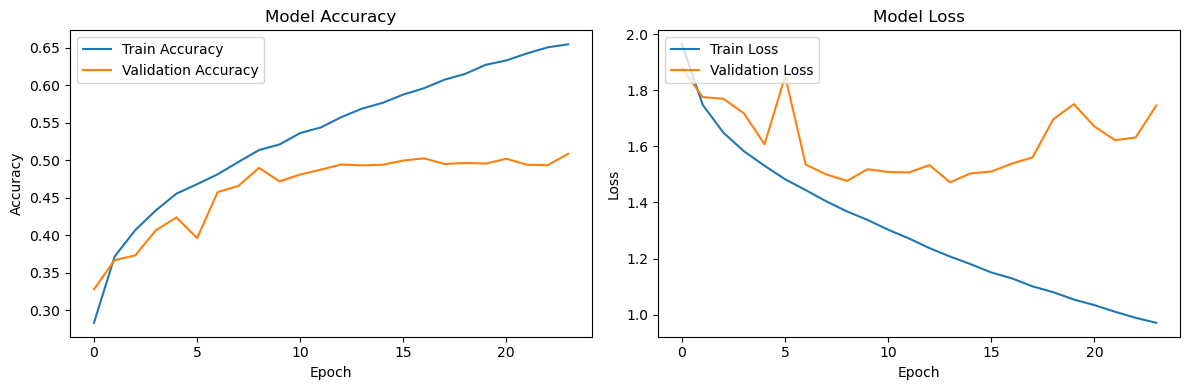

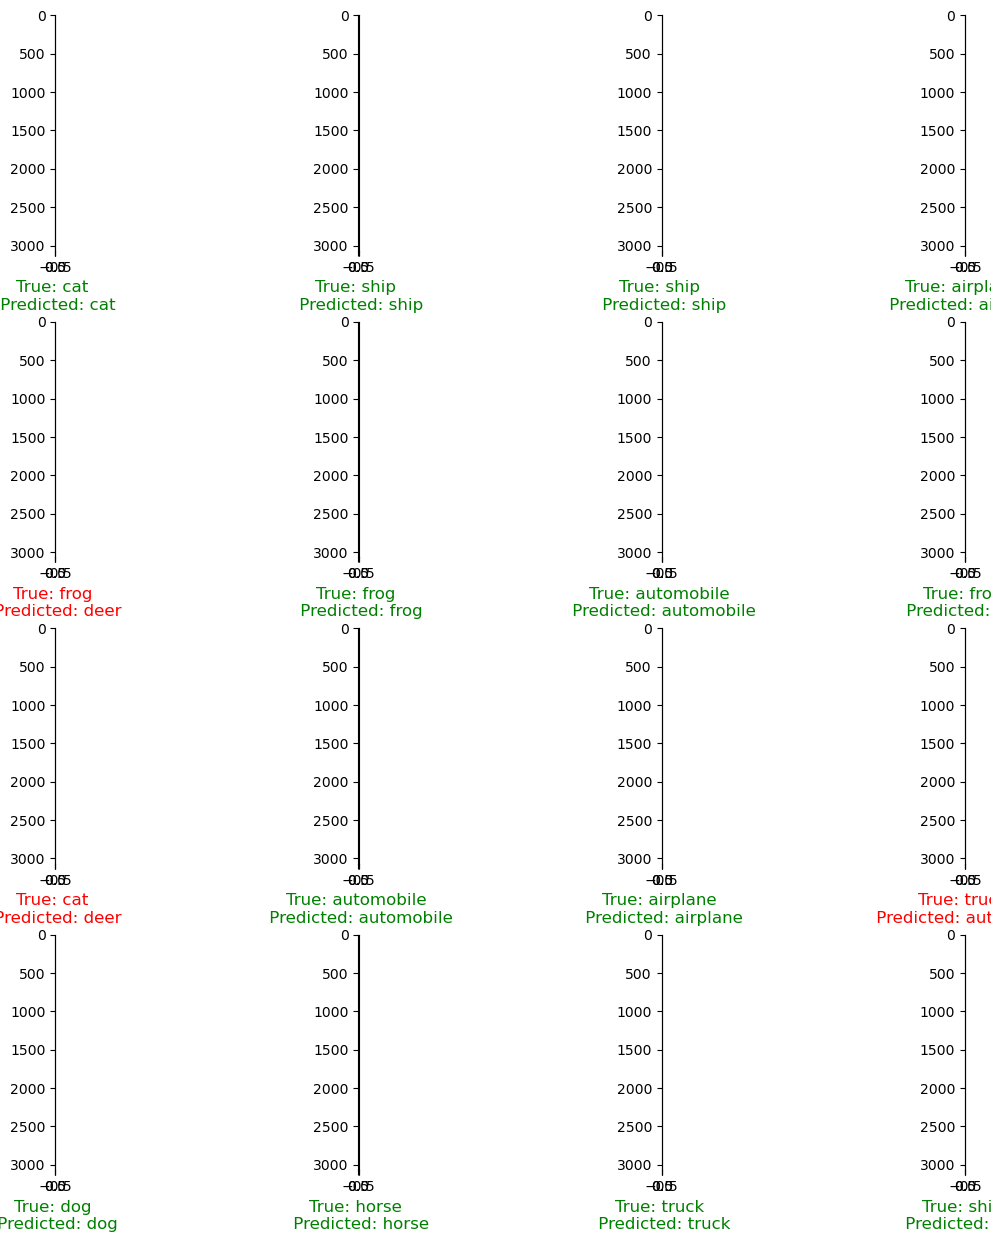

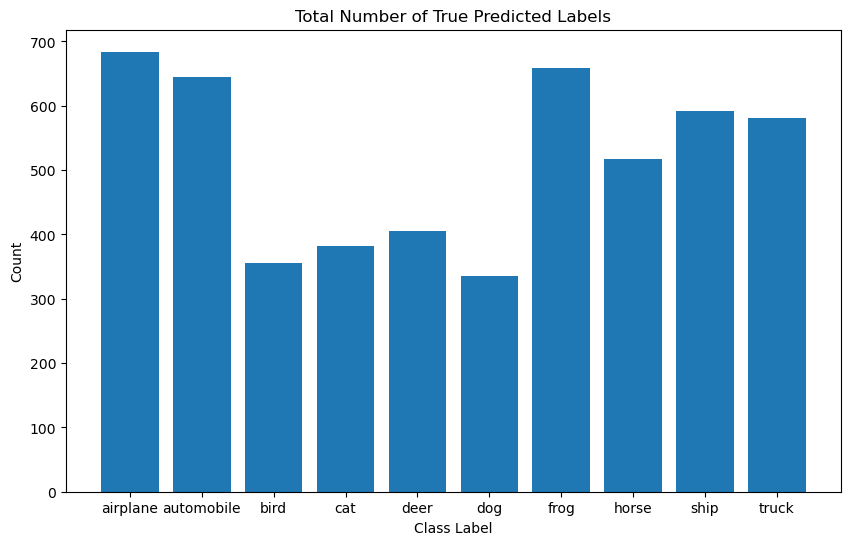

In [158]:
# TODO

def main(epochs, val_split, batch_sz):
    """Main function to run the training pipeline.

    Args:
        epochs(int, optional): Number of epochs to train the model.
        val_split: Fraction of the training data to be used as validation data.
        batch_sz: Batch size for training.

    Returns:
        None
    """

    # (TODO) Preprocess the data
    X_train_p, X_test_p, y_train_oh, y_test_oh = data_preprocessing(X_train, X_test, y_train, y_test)

    # (TODO) Build Model
    model = build_model((3072,), 10)  # ✅ Fixed input shape to (3072,)

    # (TODO) Compile model
    compile_model(model)

    # Train model
    history = train_model(X_train_p, y_train_oh, model, epochs=epochs, val_split=val_split, batch_sz=batch_sz)

    # Evaluate model
    test_loss, test_acc = model.evaluate(X_test_p, y_test_oh)
    print('Test accuracy:', test_acc)

    # Make predictions
    y_pred = model.predict(X_test_p)
    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test_oh, axis=1)

    # Plots
    plot_metrics(history)
    plot_predictions(X_test_p, y_true, y_pred, num_samples=16)
    plot_label_comparison(y_true, y_pred)

    # Validate model accuracy
    test_model_accuracy(history=history)

    return history

if __name__ == "__main__":
    
    # (TODO) Feel free to adjust the parameters
    history = main(epochs=24, val_split=0.2, batch_sz=64)
